In [9]:
import os

curr_folder = os.getcwd() + "/"
datasets_folder = curr_folder[:-6] + "Datasets/"
stats_results_folder = curr_folder + "Results/"
print(datasets_folder)
print(stats_results_folder)

/home/ipsilva/Repositories/dynamic-projections/Datasets/
/home/ipsilva/Repositories/dynamic-projections/Stats/Results/


In [2]:
datasets_subfolders = []
for i in os.walk(datasets_folder):
    datasets_subfolders.append(i[0])

datasets_subfolders = datasets_subfolders[1:]
datasets_subfolders

['/home/ipsilva/Repositories/dynamic-projections/Datasets/gaussians',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/quickdraw',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/sorts',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/walk',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/nnset',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/fashion',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/cifar10cnn',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/esc50',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/qtables',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/cartolastd']

In [3]:
dataset_number = 6
selected_dataset = datasets_subfolders[dataset_number]
selected_dataset

'/home/ipsilva/Repositories/dynamic-projections/Datasets/cifar10cnn'

In [4]:
from os import listdir
from os.path import isfile, join

files = [f for f in listdir(selected_dataset) if isfile(join(selected_dataset, f))]
files[:5]

['cifar10cnn-13.csv',
 'cifar10cnn-10.csv',
 'cifar10cnn-1.csv',
 'cifar10cnn-19.csv',
 'cifar10cnn-15.csv']

In [5]:
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import pandas as pd
import numpy as np

df = pd.DataFrame()

obs_per_timestep = []
for file in files:
    file_loc = selected_dataset + "/" + file
    ndf = pd.read_csv(file_loc)
    df = df.append(ndf)
    obs_per_timestep.append(ndf.shape[0])
    
median_obs_per_timestep = np.median(obs_per_timestep)
dev_obs_per_timestep = np.std(obs_per_timestep)

min_max_scaler = MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df.drop(columns=df.columns[0], axis=1)))
print(df.shape, df.head())

(30000, 10)           0         1         2         3         4             5         6  \
0  0.010056  0.000354  0.049481  0.598008  0.011925  1.765317e-01  0.142308   
1  0.217137  0.069947  0.000193  0.000006  0.000010  2.428705e-07  0.000001   
2  0.146347  0.076367  0.003563  0.001665  0.000809  2.178096e-04  0.000436   
3  0.369259  0.019281  0.006699  0.000377  0.000940  2.578539e-05  0.000089   
4  0.000149  0.000288  0.064469  0.087456  0.505908  2.667944e-02  0.322887   

              7         8         9  
0  3.916910e-03  0.018245  0.000929  
1  6.827640e-07  0.709652  0.004598  
2  3.173232e-04  0.734663  0.037148  
3  3.488173e-04  0.599330  0.005431  
4  8.313717e-04  0.000101  0.000241  


In [6]:
from sklearn.decomposition import PCA

def intrisic_dim(dataframe, target_variance):
    pca = PCA()

    principalComponents = pca.fit_transform(df)

    list_variance = pca.explained_variance_ratio_

    final_var = 0
    dims = 0
    for var in list_variance:
        final_var += var
        dims += 1
        if final_var > target_variance:
            break
    return dims, final_var, principalComponents[:dims]

In [7]:
target_variance = 0.9

(dims, final_var, components) = intrisic_dim(df, target_variance)

print("Total time-steps:", len(obs_per_timestep))
print("Registers per time-step (median):", median_obs_per_timestep)
print("Registers per time-step (deviation):", dev_obs_per_timestep)
print("Total dimensions:", df.shape[1])
print("Intrinsic dimensions:", dims)
print("Total variance:", final_var)

Total time-steps: 30
Registers per time-step (median): 1000.0
Registers per time-step (deviation): 0.0
Total dimensions: 10
Intrinsic dimensions: 7
Total variance: 0.9291934623725824


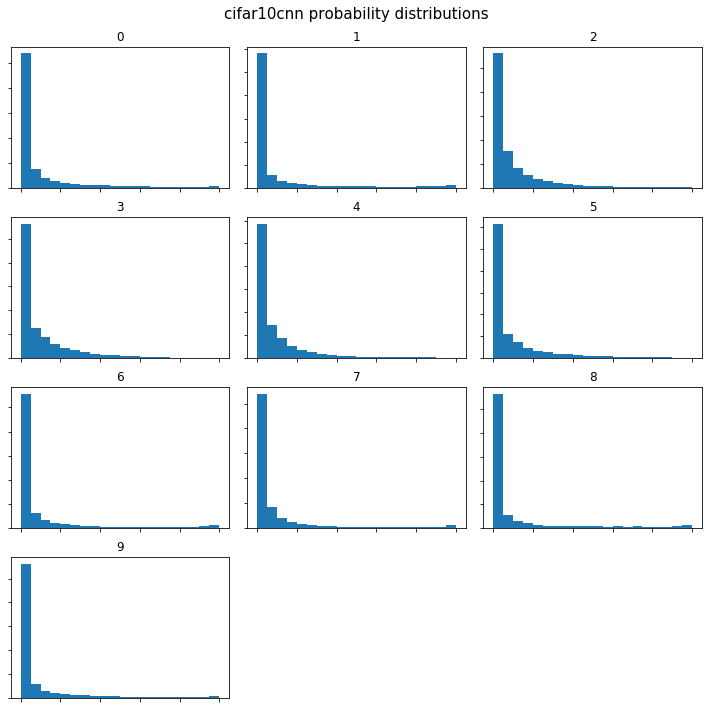

In [53]:
import matplotlib.pyplot as plt

# identifying distributions
hists_ax = df.hist(bins=20, grid=False, figsize=(10,10), density=True)

for arr in hists_ax:
    for ax in arr:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
fig_name = selected_dataset.split('/')[-1]
plt.suptitle(fig_name + " probability distributions", fontsize=15, weight='roman')
plt.tight_layout()
plt.subplots_adjust(top=0.925)
plt.savefig(stats_results_folder+"attribute_histograms/"+fig_name+"_prob_dist")